# Stable Video Diffusion

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2c550e6f-32a2-3cac-011a-c464f4e1e5c0)


In [2]:
# !pip3 install torch torchvision torchaudio diffusers transformers accelerate

In [3]:
# !pip install transformers

In [19]:
# import torch

In [ ]:

# !pip install opencv-python-headless

In [5]:
# !pip install accelerate

In [21]:
import torch
import diffusers
import transformers

In [22]:
torch.__version__

'2.3.0+cu121'

In [23]:
diffusers.__version__

'0.27.2'

In [24]:
transformers.__version__

'4.41.1'

In [25]:
import cv2

In [26]:
cv2.__version__

'4.9.0'

In [4]:
from diffusers import StableVideoDiffusionPipeline

In [7]:
pipe = StableVideoDiffusionPipeline.from_pretrained('stabilityai/stable-video-diffusion-img2vid-xt',
                                                   torch_dtype=torch.float16,
                                                   variant='fp16')
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [1]:
from diffusers.utils import load_image, export_to_video

In [9]:
image = load_image("nasa-U2uKrI4lci8-unsplash.png")

In [10]:
image.size

(1024, 576)

In [14]:
# image.resize((1024,576))

In [11]:
generator = torch.manual_seed(42)

In [12]:
frames = pipe(image,decode_chunk_size=8,generator=generator).frames[0]

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/25 [00:00<?, ?it/s]

In [8]:
export_to_video(frames,'generated.mp4',fps=7)

'generated.mp4'

In [16]:
type(frames[0])

PIL.PngImagePlugin.PngImageFile

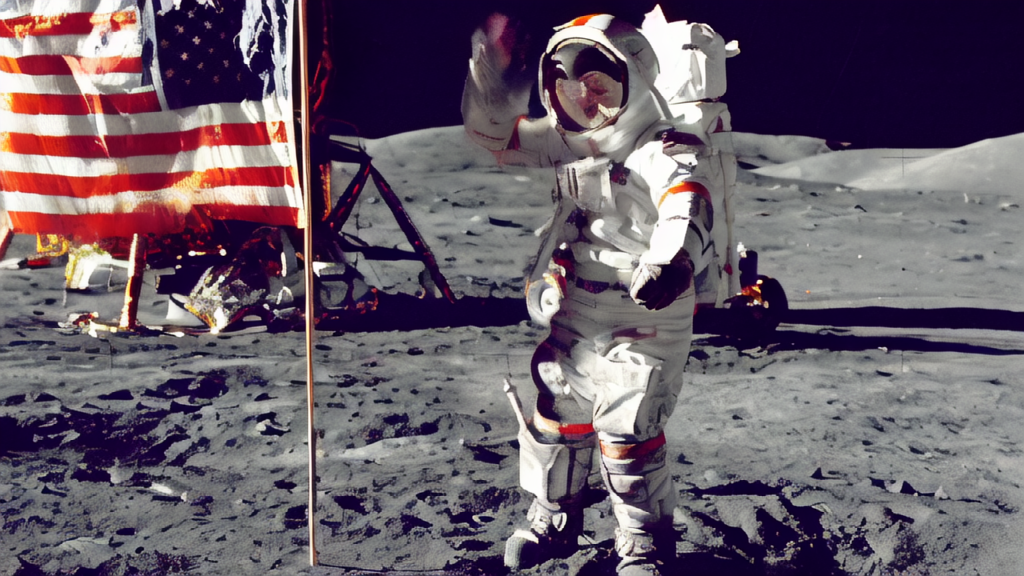

In [18]:
frames[1]